In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import scipy.sparse
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as lm
from scipy import stats

import gensim
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, punkt
from gensim.models import KeyedVectors

import matplotlib.collections as plt1
import matplotlib.pyplot as plt2
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', 50)

import pickle
import time
import re
import csv
import math
import pickle
import time
import spacy

nltk.download('punkt')

2022-12-10 15:38:26.856914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 15:38:27.085862: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-10 15:38:28.426104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /apps/software/standard/compiler/gcc/9.2.0/nodejs/12.14.1/lib:/apps/software/standard/core/gcc/9.2.0/lib/gcc/x86_64-pc-linux-gnu/9.2.0:/apps/software/standard/core/gcc/9.2.0/lib64:/apps/software/standard/

True

In [3]:
#data frame with only labeled abstracts
df_lab = pd.read_csv("/home/kno5cac/git/publicrd/data/prd/Digital_abstract_labelled/DEC-2022-labelled_abstracts.csv")

#data frame with all of the abstracts
df = pd.read_pickle("/home/kno5cac/git/publicrd/data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")

In [4]:
# Reset the index and create a variable index to link with PROJECT_ID
df.reset_index(inplace = True, drop = True)
df['index'] = df.index
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4


In [5]:
df_lab = df_lab[['PROJECT_ID','ABSTRACT','Is it related to Big-Data','label']]
df_lab.head()

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label
0,950056,ï»¿ DESCRIPTION (provided by applicant): Adv...,1,Big-data
1,1178172,Project Summary/AbstractThe establishment of t...,1,Big-data
2,163037,DESCRIPTION (provided by applicant): The long-...,0,Non Big-data
3,880197,DESCRIPTION (provided by applicant): The most ...,0,Non Big-data
4,887331,Transsphenoidal surgery (TSS) is the best trea...,0,Non Big-data


In [6]:
# merge with the labelled data using PROJECT_ID.
df['PROJECT_ID'] = pd.to_numeric(df['PROJECT_ID'])
df_merge = df.merge(df_lab[['PROJECT_ID','Is it related to Big-Data','label']], how='left', on='PROJECT_ID')
len(df_merge)

1143869

In [7]:
df_merge

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Is it related to Big-Data,label
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,NaN,NaN
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,NaN,NaN
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,NaN,NaN
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,NaN,NaN
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143864,1294186,Circadian rhythms are fundamental endogenous p...,NaN,Revealing the Palatable Meal-Inducible Circadi...,NSF,NSF,NaN,1931115,5/1/2020 12:00:00 AM,4/30/2025 12:00:00 AM,NaN,NaN,NaN,800771545,UNIVERSITY OF TEXAS SW MED CTR,NaN,NaN,NaN,NaN,NaN,NaN,47.074,2020,700000.0,NaN,1,0,700000.0,1,circadian_rhythm fundamental endogenous proper...,1143864,NaN,NaN
1143865,1294187,Recent research suggests that learning about g...,NaN,Collaborative Research : Improving the teachin...,NSF,NSF,NaN,1956119,7/1/2020 12:00:00 AM,6/30/2025 12:00:00 AM,NaN,NaN,NaN,170230239,UNIVERSITY OF TEXAS AUSTIN,NaN,NaN,NaN,NaN,NaN,NaN,47.076,2020,136238.0,NaN,3,0,672158.0,3,recent research suggest learn genetic high sch...,1143865,NaN,NaN
1143866,1294188,The COVID-19 pandemic has caused unprecedented...,NaN,Collaborative Research: RAPID: Maintain Mobili...,NSF,NSF,NaN,2028098,4/15/2020 12:00:00 AM,3/31/2021 12:00:00 AM,NaN,NaN,NaN,003387891,UNIVERSITY OF TENNESSEE KNOXVILLE,NaN,NaN,NaN,NaN,NaN,NaN,47.041,2020,132226.0,NaN,2,0,182205.0,2,covid_19_pandemic cause unprecedented disrupti...,1143866,NaN,NaN
1143867,1294189,Subduction zones – locations where one of the ...,NaN,Collaborative Research: Synthesiz

In [8]:
# Save project ID of labelled data
project_id_lab = list(df_lab['PROJECT_ID'])

# Get the index of labelled abstract
subset_df = df_merge.loc[df_merge['PROJECT_ID'].isin(project_id_lab),['index', 'PROJECT_ID']]
index_lab = list(subset_df['index'])

# 1. TFIDF approach

## 1.1. Vectorize, build the training and test sample

In [9]:
# Compute the TFIDF matrix on the full data
v = TfidfVectorizer()
tfidf = v.fit_transform(df['ABSTRACT'])

In [10]:
tfidf

<1143869x1307953 sparse matrix of type '<class 'numpy.float64'>'
	with 213160046 stored elements in Compressed Sparse Row format>

In [11]:
# Subset the TFIDF matrix on labelled data: select rows corresponding to the index
tfidf_lab = tfidf[index_lab,:]
tfidf_lab.shape

(1600, 1307953)

In [12]:
project_id_training = pd.read_csv('final_projectid_training.csv')
project_id_testing = pd.read_csv('final_projectid_testing.csv')

In [13]:
# convert to lists
project_id_training = list(project_id_training['0'])
project_id_testing = list(project_id_testing['0'])

In [14]:
df_train = df_merge[df_merge['PROJECT_ID'].isin(project_id_training)]
df_test = df_merge[df_merge['PROJECT_ID'].isin(project_id_testing)]

In [15]:
# Build the training and test sample: randomly select 80% of index_lab as training and the rest as test
#import random

# Build the index for the training and the test
#index_training = random.sample(index_lab, int(0.8 * len(index_lab)))
#index_test = list(set(index_lab) - set(index_training))

# sort those index (sort help to extract the Y value for each set)
#index_training.sort()
#index_test.sort()

In [16]:
# Extract those index in the TFIDF matrix and compute the X training and Test
X_train_tfidf = tfidf[df_train['index'],:]
X_test_tfidf = tfidf[df_test['index'],:]

In [17]:
# Create Y for training and test using the index order from the sampling
Y_train_tfidf = [df_merge.loc[df_merge['index']== i,'label'].values.tolist() for i in df_train['index']]
Y_train_tfidf = sum(Y_train_tfidf, [])

Y_test_tfidf = [df_merge.loc[df_merge['index']== i,'label'].values.tolist() for i in df_test['index']]
Y_test_tfidf = sum(Y_test_tfidf, [])

## 1.2. KNN classifier

In [18]:
# number of neighbors
k = int(math.sqrt(len(Y_train_tfidf)))
print('Number of neighbors:', k)

Number of neighbors: 35


In [19]:
# Run KNN
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors= k)

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifierKNN,X_train_tfidf,Y_train_tfidf, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifierKNN.fit(X_train_tfidf,Y_train_tfidf)

[0.65625    0.7265625  0.72265625 0.6875     0.67578125]
Accuracy: 0.69.   Standard Deviation: 0.03


KNeighborsClassifier(n_neighbors=35)

In [20]:
# Predict the classification
Y_pred_tfidf = classifierKNN.predict(X_test_tfidf)

In [21]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_tfidf, Y_pred_tfidf)
#print(confusion)
print(classification_report(Y_test_tfidf, Y_pred_tfidf))

              precision    recall  f1-score   support

    Big-data       0.59      0.95      0.73       139
Non Big-data       0.93      0.49      0.64       181

    accuracy                           0.69       320
   macro avg       0.76      0.72      0.68       320
weighted avg       0.78      0.69      0.68       320



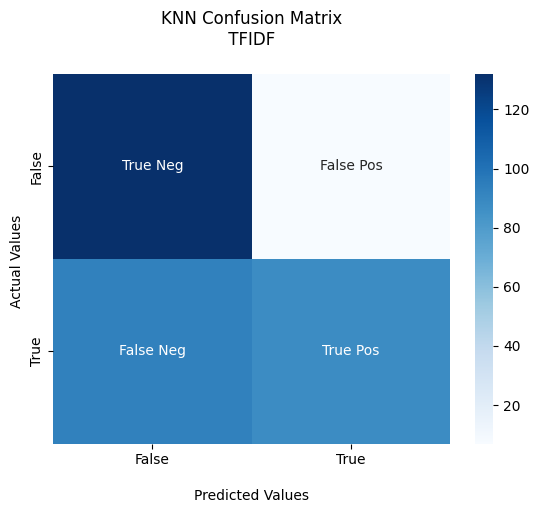

In [22]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('KNN Confusion Matrix\n TFIDF \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('tfidf_KNN.PNG')
plt2.show()

In [24]:
# Predict the classification for the whole data: use the whole TFIDF
Y_tfidf = classifierKNN.predict(tfidf)

# The TFIDF keep the order from index. Just add the prediction as new variable
df_merge['Prediction_KNN'] = Y_tfidf
df_merge.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Is it related to Big-Data,label,Prediction_KNN
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,NaN,NaN,Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,NaN,NaN,Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,NaN,NaN,Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,NaN,NaN,Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,NaN,NaN,Big-data


In [25]:
# Count the number of projects that is Big data related
df_bigdata = df_merge[df_merge['Prediction_KNN']=='Big-data']
print('Number of abstracts related to Big data:', len(df_bigdata))

Number of abstracts related to Big data: 446701


In [26]:
cb_pal = {"blue":'#377eb8', "orange":'#ff7f00', "green":'#4daf4a', "pink":'#f781bf', "brown":'#a65628', 
          "purple":'#984ea3', "gray":'#999999', "red":'#e41a1c', "yellow":'#dede00'}

/tmp/ipykernel_78861/234042915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bigdata["FY"] = df_bigdata["FY"].astype('int')
/tmp/ipykernel_78861/234042915.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


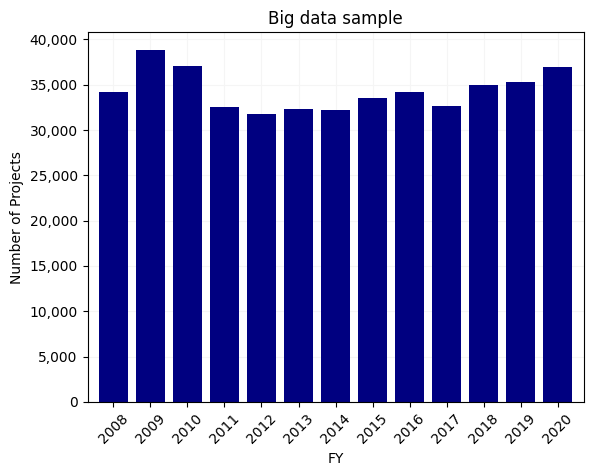

In [27]:
# Distribution over time and agencies
df_bigdata["FY"] = df_bigdata["FY"].astype('int')
year_counts = df_bigdata['FY'].value_counts().sort_index(ascending=True)

# Distribution
year = year_counts.index.tolist()
count = year_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt2.xlim(2007.3,2020.7)
plt2.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt2.xlabel("FY")
plt2.ylabel("Number of Projects")
plt2.title("Big data sample")

plt2.savefig("big_data_time.png", dpi = 800, bbox_inches = "tight")

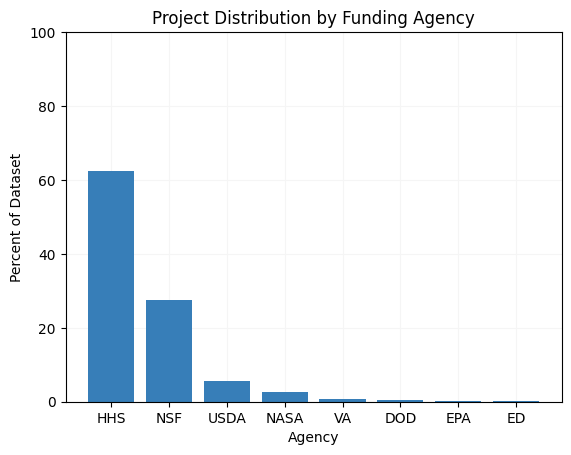

In [28]:
agency_counts = 100*df_bigdata["DEPARTMENT"].value_counts()/len(df_bigdata)
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(agency, count, color=cb_pal['blue'])
plt2.ylim(0,100)
plt2.xlabel("Agency")
plt2.ylabel("Percent of Dataset")
plt2.title("Project Distribution by Funding Agency")

plt2.savefig("big_data_agency.png", dpi = 800, bbox_inches = "tight")

In [29]:
# save the data
#df_bigdata.to_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/tfidf_method.csv")

## 1.3. SVM

In [30]:
# We run SVM with default parameters provides by Sklearn. We train the model
from sklearn import svm
classifier_svm = svm.SVC()

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifier_svm,X_train_tfidf,Y_train_tfidf, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifier_svm.fit(X_train_tfidf,Y_train_tfidf)

[0.80859375 0.8125     0.81640625 0.82421875 0.79296875]
Accuracy: 0.81.   Standard Deviation: 0.01


SVC()

In [31]:
# Predict the classification
Y_pred_tfidf = classifier_svm.predict(X_test_tfidf)

In [32]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_tfidf, Y_pred_tfidf)
#print(confusion)
print(classification_report(Y_test_tfidf, Y_pred_tfidf))

              precision    recall  f1-score   support

    Big-data       0.82      0.71      0.76       139
Non Big-data       0.80      0.88      0.84       181

    accuracy                           0.81       320
   macro avg       0.81      0.80      0.80       320
weighted avg       0.81      0.81      0.81       320



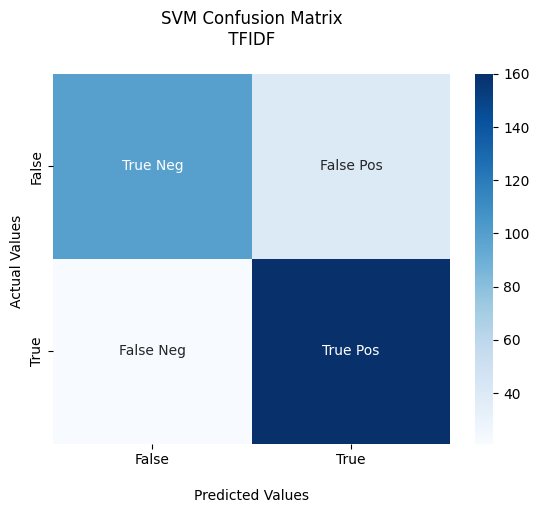

In [33]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('SVM Confusion Matrix\n TFIDF \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('tfidf_SVM.PNG')
plt2.show()

In [34]:
# Predict the classification for the whole data: use the whole TFIDF
Y_tfidf = classifier_svm.predict(tfidf)

# The TFIDF keep the order from index. Just add the prediction as new variable
df_merge['Prediction_SVM'] = Y_tfidf
df_merge.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Is it related to Big-Data,label,Prediction_KNN,Prediction_SVM
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,NaN,NaN,Big-data,Non Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,NaN,NaN,Big-data,Non Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,NaN,NaN,Big-data,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,NaN,NaN,Big-data,Non Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,NaN,NaN,Big-data,Non Big-data


In [35]:
# Cross comparision between SVM and KNN
pd.crosstab(df_merge['Prediction_KNN'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_KNN,,,
Big-data,25368,421333,446701
Non Big-data,88,697080,697168
Total,25456,1118413,1143869


## 1.4. Decision Tree

In [36]:
# Use default parameters provides by SKLearn and train the model
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier()

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifier_DT,X_train_tfidf,Y_train_tfidf, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifier_DT.fit(X_train_tfidf,Y_train_tfidf)

[0.7734375  0.78125    0.80078125 0.79296875 0.734375  ]
Accuracy: 0.78.   Standard Deviation: 0.02


DecisionTreeClassifier()

In [37]:
# Predict the classification
Y_pred_tfidf = classifier_DT.predict(X_test_tfidf)

In [38]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_tfidf, Y_pred_tfidf)
#print(confusion)
print(classification_report(Y_test_tfidf, Y_pred_tfidf))

              precision    recall  f1-score   support

    Big-data       0.69      0.68      0.69       139
Non Big-data       0.76      0.77      0.76       181

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



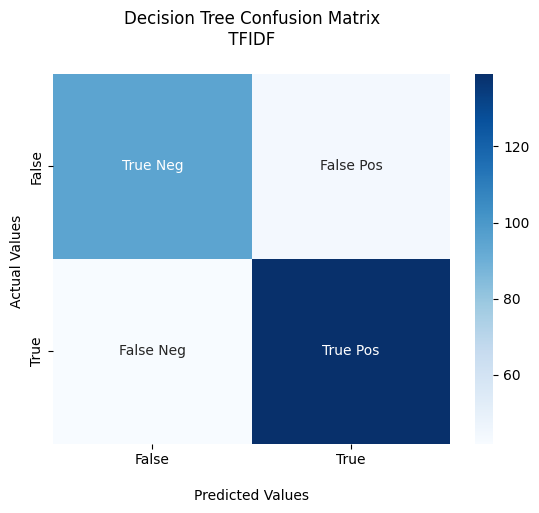

In [39]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix\n TFIDF \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('tfidf_DT.PNG')
plt2.show()

In [40]:
# Predict the classification for the whole data: use the whole TFIDF
Y_tfidf = classifier_DT.predict(tfidf)

# The TFIDF keep the order from index. Just add the prediction as new variable
df_merge['Prediction_DT'] = Y_tfidf
df_merge.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Is it related to Big-Data,label,Prediction_KNN,Prediction_SVM,Prediction_DT
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,NaN,NaN,Big-data,Non Big-data,Non Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,NaN,NaN,Big-data,Non Big-data,Non Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,NaN,NaN,Big-data,Non Big-data,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,NaN,NaN,Big-data,Non Big-data,Non Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,NaN,NaN,Big-data,Non Big-data,Non Big-data


In [41]:
# Cross comparision between NN and SVM
pd.crosstab(df_merge['Prediction_DT'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_DT,,,
Big-data,18697,117824,136521
Non Big-data,6759,1000589,1007348
Total,25456,1118413,1143869


In [42]:
# Cross comparision between NN and KNN
pd.crosstab(df_merge['Prediction_DT'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_DT,,,
Big-data,87681,48840,136521
Non Big-data,359020,648328,1007348
Total,446701,697168,1143869


## 1.5. Random Forest

In [43]:
# Use default parameters provides by SKLearn and train the model
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifier_RF,X_train_tfidf,Y_train_tfidf, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifier_RF.fit(X_train_tfidf,Y_train_tfidf)

[0.80078125 0.80078125 0.80859375 0.79296875 0.7578125 ]
Accuracy: 0.79.   Standard Deviation: 0.02


RandomForestClassifier()

In [44]:
# Predict the classification
Y_pred_tfidf = classifier_RF.predict(X_test_tfidf)

In [45]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_tfidf, Y_pred_tfidf)
#print(confusion)
print(classification_report(Y_test_tfidf, Y_pred_tfidf))

              precision    recall  f1-score   support

    Big-data       0.78      0.73      0.75       139
Non Big-data       0.80      0.84      0.82       181

    accuracy                           0.79       320
   macro avg       0.79      0.78      0.79       320
weighted avg       0.79      0.79      0.79       320



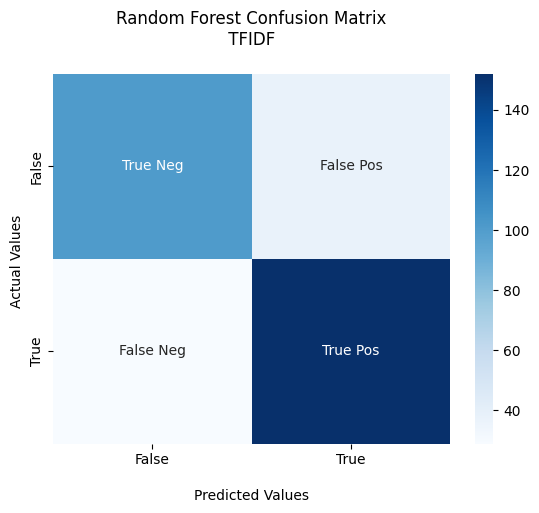

In [46]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('Random Forest Confusion Matrix\n TFIDF \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('tfidf_RF.PNG')
plt2.show()

In [47]:
# Predict the classification for the whole data: use the whole TFIDF
Y_tfidf = classifier_RF.predict(tfidf)

# The TFIDF keep the order from index. Just add the prediction as new variable
df_merge['Prediction_RF'] = Y_tfidf
df_merge.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Is it related to Big-Data,label,Prediction_KNN,Prediction_SVM,Prediction_DT,Prediction_RF
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,NaN,NaN,Big-data,Non Big-data,Non Big-data,Non Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,NaN,NaN,Big-data,Non Big-data,Non Big-data,Non Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,NaN,NaN,Big-data,Non Big-data,Non Big-data,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,NaN,NaN,Big-data,Non Big-data,Non Big-data,Non Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,NaN,NaN,Big-data,Non Big-data,Non Big-data,Non Big-data


In [48]:
# Cross comparision between RF and DT
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_DT'], margins=True, margins_name="Total")

Prediction_DT,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,27126,36219,63345
Non Big-data,109395,971129,1080524
Total,136521,1007348,1143869


In [49]:
# Cross comparision between RF and SVM
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,18586,44759,63345
Non Big-data,6870,1073654,1080524
Total,25456,1118413,1143869


In [67]:
# Cross comparision between RF and SVM
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,33750,2183,35933
Non Big-data,336756,771180,1107936
Total,370506,773363,1143869


## 1.6. Neural network classifier

In [ ]:
# Use default parameters provides by SKLearn and train the model
from sklearn.neural_network import MLPClassifier
classifier_nn = MLPClassifier()

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifier_nn,X_train_tfidf,Y_train_tfidf, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifier_nn.fit(X_train_tfidf,Y_train_tfidf)

[0.8203125  0.83984375 0.80078125 0.8125     0.8046875 ]
Accuracy: 0.82.   Standard Deviation: 0.01


In [ ]:
# Predict the classification
Y_pred_tfidf = classifier_nn.predict(X_test_tfidf)

In [ ]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_tfidf, Y_pred_tfidf)
#print(confusion)
print(classification_report(Y_test_tfidf, Y_pred_tfidf))

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('Neural Network Confusion Matrix\n TFIDF \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('tfidf_NN.PNG')
plt2.show()

In [ ]:
# Predict the classification for the whole data: use the whole TFIDF
Y_tfidf = classifier_nn.predict(tfidf)

# The TFIDF keep the order from index. Just add the prediction as new variable
df_merge['Prediction_NN'] = Y_tfidf
df_merge.head()

In [ ]:
# Cross comparision between NN and KNN
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and SVM
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and DT
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_DT'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and RF
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_RF'], margins=True, margins_name="Total")

In [ ]:
# save the data
df_merge.to_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/FR_final_predicted_tfidf.csv")

## 1.7. Decision rule based on all classifiers

In [ ]:
# Compute a score to be identify as big data
df_merge = pd.read_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/FR_final_predicted.csv")
df_merge['score'] = np.where(df_merge['Prediction_KNN'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_SVM'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_DT'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_RF'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_NN'].str.contains("Non Big-data"), 0, 1)

In [ ]:
df_merge.head()

In [ ]:
# Distribution of abstracts
df_merge['score'].value_counts()

In [ ]:
# Used a rule (majority votes from classifiers) to identify Big-data abstracts. Useful because we have an impair number of classifier
df_merge['Big_data'] = 0
df_merge.loc[df_merge['score']>3,'Big_data'] = 1
df_merge['Big_data'].value_counts()

In [ ]:
# subset the data to big-data and save
df_bigdata = df_merge[df_merge['Big_data']==1]
df_bigdata.to_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/abstracts_classification_big_data.csv")

## Descriptive statistics of our Big data

In [ ]:
# Distribution over time and agencies
df_bigdata["FY"] = df_bigdata["FY"].astype('int')
year_counts = df_bigdata['FY'].value_counts().sort_index(ascending=True)

# Distribution
year = year_counts.index.tolist()
count = year_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt2.xlim(2007.3,2020.7)
plt2.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt2.xlabel("FY")
plt2.ylabel("Number of Projects")
plt2.title("Big Data Sample Over Time \n TFIDF \n")

plt2.savefig("tfidf_big_data_time.png", dpi = 800, bbox_inches = "tight")

In [ ]:
agency_counts = 100*df_bigdata["DEPARTMENT"].value_counts()/len(df_bigdata)
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(agency, count, color=cb_pal['blue'])
plt2.ylim(0,100)
plt2.xlabel("Agency")
plt2.ylabel("Percent of Dataset")
plt2.title("Project Distribution by Funding Agency \n TFIDF \n")

plt2.savefig("tfidf_big_data_agency.png", dpi = 800, bbox_inches = "tight")